 # <center> **SD201 Final Project** <center/>

 <center> Socioeconomic analysis of ENEM <center/>

# Notebook import libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.spatial.distance import cdist

# Importing the data and selecting the columns of interest

## Loading Dataset

### To make the code easier to run, we imported the dataset from a Github account of one of the group members, so that it was not necessary to download the dataset. The data is originally available at: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem <br> As the dataset holds more than 3 million lines of data, it takes a while to load

In [ ]:
# ENEM dataset
path_data = 'https://github.com/rafaelguaracho/SD201/blob/main/Final%20Projet/MICRODATA_ENEM_2021.csv?raw=true' 
# Dataset that will be used to plot the average grade distribution along Brazil
path_loc = 'https://media.githubusercontent.com/media/rafaelguaracho/SD201/main/Final%20Projet/BR_LOCATIONS.csv' 
df = pd.read_csv(path_data, sep = ";",encoding='ISO-8859-1')
df_loc = pd.read_csv(path_loc, sep = ",",encoding='ISO-8859-1')

In [ ]:
#Showing Dataset Cols
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
df.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210053865474    2021                5       F                1   
1  210052384164    2021               12       M                1   
2  210052589243    2021               13       F                3   
3  210052128335    2021                3       M                1   
4  210051353021    2021                2       F                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            1                 1                1                3          1   
1            1                 1                1               11          1   
2            1                 1                1               15          1   
3            3                 1                2                0          2   
4            3                 1                2                0          2   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     A     A     A    B     A    A     B     A     B     B  
1  ...     A     A     A    B     A    A     C     A     A     A  
2  ...     B     A     A    B     A    A     C     B     B     B  
3  ...     A     A     A    B     A    A     B     A     B     B  
4  ...     B     A     A    B     A    B     E     A     B     B  

[5 rows x 76 columns]

## Cols Selection

In [ ]:
df.rename(
    columns={
        'NU_INSCRICAO':'FILE_NUMBER', #an id
        'NU_ANO':'ENEM_YEAR', #for this dataset this will always be 2021
        'TP_FAIXA_ETARIA':'AGE', #this column has age ranges
        'TP_SEXO':'SEX',
        'TP_ESTADO_CIVIL':'MARITAL_STATUS',
        'TP_COR_RACA': 'RACE',
        'TP_NACIONALIDADE':'NATIONALITY',
        'TP_ST_CONCLUSAO': 'HIGH_SCHOOL_STATUS',
        'TP_ANO_CONCLUIU': 'HIGH_SCHOOL_GRADUATION_YEAR',
        'TP_ESCOLA' : 'SCHOOL_TYPE', # private, public or not declared
        'TP_ENSINO': 'HIGH_SCHOOL_DIPLOMA_TYPE', #regular diploma or special test that is equivalent
        'IN_TREINEIRO' : 'TRAINEE',
        'CO_MUNICIPIO_ESC': 'SCHOOL_MUNICIPALITY_CODE',
        'NO_MUNICIPIO_ESC': 'SCHOOL_MUNICIPALITY_NAME',
        'CO_UF_ESC': 'SCHOOL_STATE_CODE',
        'SG_UF_ESC': 'SCHOOL_STATE_ACRONYM',
        'TP_DEPENDENCIA_ADM_ESC': 'SCHOOL_OWNERSHIP', #federal, state, municipal or private school
        'TP_LOCALIZACAO_ESC': 'SCHOOL_AREA', #urban or rural
        'TP_SIT_FUNC_ESC': 'SCHOOL_SITUATION', #in activity, closed, paralyzed
        'CO_MUNICIPIO_PROVA': 'TEST_MUNICIPALITY_CODE', #where the test was taken
        'NO_MUNICIPIO_PROVA':'TEST_MUNICIPALITY_NAME',
        'CO_UF_PROVA':'TEST_STATE_CODE',
        'SG_UF_PROVA':'TEST_STATE_NAME',
        'TP_PRESENCA_CN':'ATTENDANCE_NS', #natural sciences exam attendance
        'TP_PRESENCA_CH':'ATTENDANCE_H', #humanities exam attendance
        'TP_PRESENCA_LC':'ATTENDANCE_L', #languanges exam attendance
        'TP_PRESENCA_MT':'ATTENDANCE_M', #math exam attendance
        'CO_PROVA_CN':'COLOR_NS', # Each exam has several variations, where the
                                 # questions and their respective answers are in 
                                 # a different order to avoid cheating. 
                                 # Each variation is represented by a different color
                                 # and this variable describes which variation
                                 # the student had
        'CO_PROVA_CH':'COLOR_H',
        'CO_PROVA_LC':'COLOR_L',
        'CO_PROVA_MT':'COLOR_M', 

        'NU_NOTA_CN': 'NATURAL_S', #grades for each exam
        'NU_NOTA_CH': 'HUMANITIES',
        'NU_NOTA_LC': 'LANGUAGES',
        'NU_NOTA_MT': 'MATHEMATICS',

        'TX_RESPOSTAS_CN': 'ANSWERS_NS', #vector with student answers for each exam
        'TX_RESPOSTAS_CH': 'ANSWERS_H',
        'TX_RESPOSTAS_LC': 'ANSWERS_L',
        'TX_RESPOSTAS_MT': 'ANSWERS_M',

        'TP_LINGUA' :'FOREIGN_LANGUAGE', #Foreign language chosen by student (english or spanish)
        'TX_GABARITO_CN':'RIGHT_ANSWERS_NS', #vector with the right answers for the exam
        'TX_GABARITO_CH':'RIGHT_ANSWERS_H',
        'TX_GABARITO_LC':'RIGHT_ANSWERS_L',
        'TX_GABARITO_MT':'RIGHT_ANSWERS_M',

        'TP_STATUS_REDACAO':'ESSAY_STATUS', #Variable that indicates if the essay 
                                            #was annulled, if the topic was not correct, 
                                            #if there were no problems, if it was a copy...
        'NU_NOTA_COMP1':'COMP1_GRADE', #the essay is graded based on 5 categories, those
                                       #are not relevant for the analysis that will be made
                                       #but they take into account creativity, write without errors...
        'NU_NOTA_COMP2':'COMP2_GRADE',
        'NU_NOTA_COMP3':'COMP3_GRADE',
        'NU_NOTA_COMP4':'COMP4_GRADE',
        'NU_NOTA_COMP5':'COMP5_GRADE',
        'NU_NOTA_REDACAO': 'ESSAY', #essay final grade
    },
    inplace=True,
)
#renaming location columns 
df_loc = df_loc.rename(columns={"CD_GEOCODM,C,20":"CD_GEOCODM","LONG,N,24,6":"LONG","LAT,N,24,6":"LAT"})

In [ ]:
#showing the dataframe with translated columns
df.head(5)

FILE_NUMBER  ENEM_YEAR  AGE SEX  MARITAL_STATUS  RACE  NATIONALITY  \
0  210053865474       2021    5   F               1     1            1   
1  210052384164       2021   12   M               1     1            1   
2  210052589243       2021   13   F               3     1            1   
3  210052128335       2021    3   M               1     3            1   
4  210051353021       2021    2   F               1     3            1   

   HIGH_SCHOOL_STATUS  HIGH_SCHOOL_GRADUATION_YEAR  SCHOOL_TYPE  ...  Q016  \
0                   1                            3            1  ...     A   
1                   1                           11            1  ...     A   
2                   1                           15            1  ...     B   
3                   2                            0            2  ...     A   
4                   2                            0            2  ...     B   

   Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0     A     A    B     A    A     B     A     B     B  
1     A     A    B     A    A     C     A     A     A  
2     A     A    B     A    A     C     B     B     B  
3     A     A    B     A    A     B     A     B     B  
4     A     A    B     A    B     E     A     B     B  

[5 rows x 76 columns]

## Encoding data

In [ ]:
# creating a dataframe to enconder the categorical data
df_encoded = df.copy()

In [ ]:
# using ordinal enconder for categorical data
encoder = OrdinalEncoder()
cols_to_enc = ['SEX', 'RACE'] + [f'Q00{i}' for i in range(1,10)]  + [f'Q0{i}' for i in range(10,26)]
df_encoded[cols_to_enc] = encoder.fit_transform(df_encoded[cols_to_enc])

In [ ]:
#showing encoded categorical data 
df_encoded[cols_to_enc].head(5)

SEX  RACE  Q001  Q002  Q003  Q004  Q005  Q006  Q007  Q008  ...  Q016  Q017  \
0  0.0   1.0   5.0   5.0   1.0   1.0   2.0   3.0   0.0   1.0  ...   0.0   0.0   
1  1.0   1.0   1.0   1.0   1.0   1.0   2.0   1.0   0.0   1.0  ...   0.0   0.0   
2  0.0   1.0   1.0   2.0   2.0   1.0   2.0   2.0   0.0   1.0  ...   1.0   0.0   
3  1.0   3.0   1.0   1.0   1.0   1.0   5.0   1.0   0.0   1.0  ...   0.0   0.0   
4  0.0   3.0   3.0   4.0   5.0   3.0   3.0   2.0   0.0   1.0  ...   1.0   0.0   

   Q018  Q019  Q020  Q021  Q022  Q023  Q024  Q025  
0   0.0   1.0   0.0   0.0   1.0   0.0   1.0   1.0  
1   0.0   1.0   0.0   0.0   2.0   0.0   0.0   0.0  
2   0.0   1.0   0.0   0.0   2.0   1.0   1.0   1.0  
3   0.0   1.0   0.0   0.0   1.0   0.0   1.0   1.0  
4   0.0   1.0   0.0   1.0   4.0   0.0   1.0   1.0  

[5 rows x 27 columns]

In [ ]:
#now we'll also translate the Questions Columns to more meaningfull ones.
df_encoded.rename(
    columns={ 
        'Q001':'FATHER_SCHOOL_LEVEL',
        'Q002': 'MOTHER_SCHOOL_LEVEL',
        'Q003':'FATHER_JOB',
        'Q004':'MOTHER_JOB',
        'Q005':'PEOPLE_IN_HOUSE', #how much people the student live with
        'Q006': 'INCOME', #family income
        'Q007':'MAID', #how many maids in the student's home
        'Q008':'BATHROOM', #how many bathrooms in the student's home
        'Q009':'BEDROOM', #how many bedrooms in the student's home
        'Q010':'CAR', #how many cars in the student's home
        'Q011':'MOTORCYCLE', #how many motorcycles in the student's home
        'Q012':'FRIDGE',  # how many fridges in the student's home
        'Q013':'FREEZER', #how many freezers in the student's home
        'Q014': 'WASHING_MACHINE', 
        'Q015':'DRYING_MACHINE',
        'Q016':'MICROWAVE_OVEN',
        'Q017':'DISHWASHER',
        'Q018':'VACUUM_CLEANER',
        'Q019':'TV',
        'Q020':'DVD',
        'Q021':'PPV_TV', #if there is pay-per-view channels in student's home
        'Q022':'CELLPHONE',
        'Q023':'TELEPHONE',
        'Q024':'COMPUTER',
        'Q025':'INTERNET' 
    },
    inplace = True
)

In [ ]:
#showing the encoded data
df_encoded.head()

FILE_NUMBER  ENEM_YEAR  AGE  SEX  MARITAL_STATUS  RACE  NATIONALITY  \
0  210053865474       2021    5  0.0               1   1.0            1   
1  210052384164       2021   12  1.0               1   1.0            1   
2  210052589243       2021   13  0.0               3   1.0            1   
3  210052128335       2021    3  1.0               1   3.0            1   
4  210051353021       2021    2  0.0               1   3.0            1   

   HIGH_SCHOOL_STATUS  HIGH_SCHOOL_GRADUATION_YEAR  SCHOOL_TYPE  ...  \
0                   1                            3            1  ...   
1                   1                           11            1  ...   
2                   1                           15            1  ...   
3                   2                            0            2  ...   
4                   2                            0            2  ...   

   MICROWAVE_OVEN  DISHWASHER  VACUUM_CLEANER   TV  DVD PPV_TV  CELLPHONE  \
0             0.0         0.0             0.0  1.0  0.0    0.0        1.0   
1             0.0         0.0             0.0  1.0  0.0    0.0        2.0   
2             1.0         0.0             0.0  1.0  0.0    0.0        2.0   
3             0.0         0.0             0.0  1.0  0.0    0.0        1.0   
4             1.0         0.0             0.0  1.0  0.0    1.0        4.0   

   TELEPHONE  COMPUTER  INTERNET  
0        0.0       1.0       1.0  
1        0.0       0.0       0.0  
2        1.0       1.0       1.0  
3        0.0       1.0       1.0  
4        0.0       1.0       1.0  

[5 rows x 76 columns]

In [ ]:
#dropping columns that we don't want to see in correlation confusion matrix
drop_cols = ['FILE_NUMBER','ENEM_YEAR','ATTENDANCE_NS','ATTENDANCE_H','ATTENDANCE_L',
             'ATTENDANCE_M', 'COLOR_H','COLOR_L', 'COLOR_M', 'COLOR_NS', 'ANSWERS_NS', 
             'ANSWERS_H', 'ANSWERS_L', 'ANSWERS_M', 'RIGHT_ANSWERS_NS', 'RIGHT_ANSWERS_H',
             'RIGHT_ANSWERS_L', 'RIGHT_ANSWERS_M' ]

df_corr = df_encoded.drop(drop_cols, axis=1)

In [ ]:
# correlation calculation
colcor = df_corr.corr()

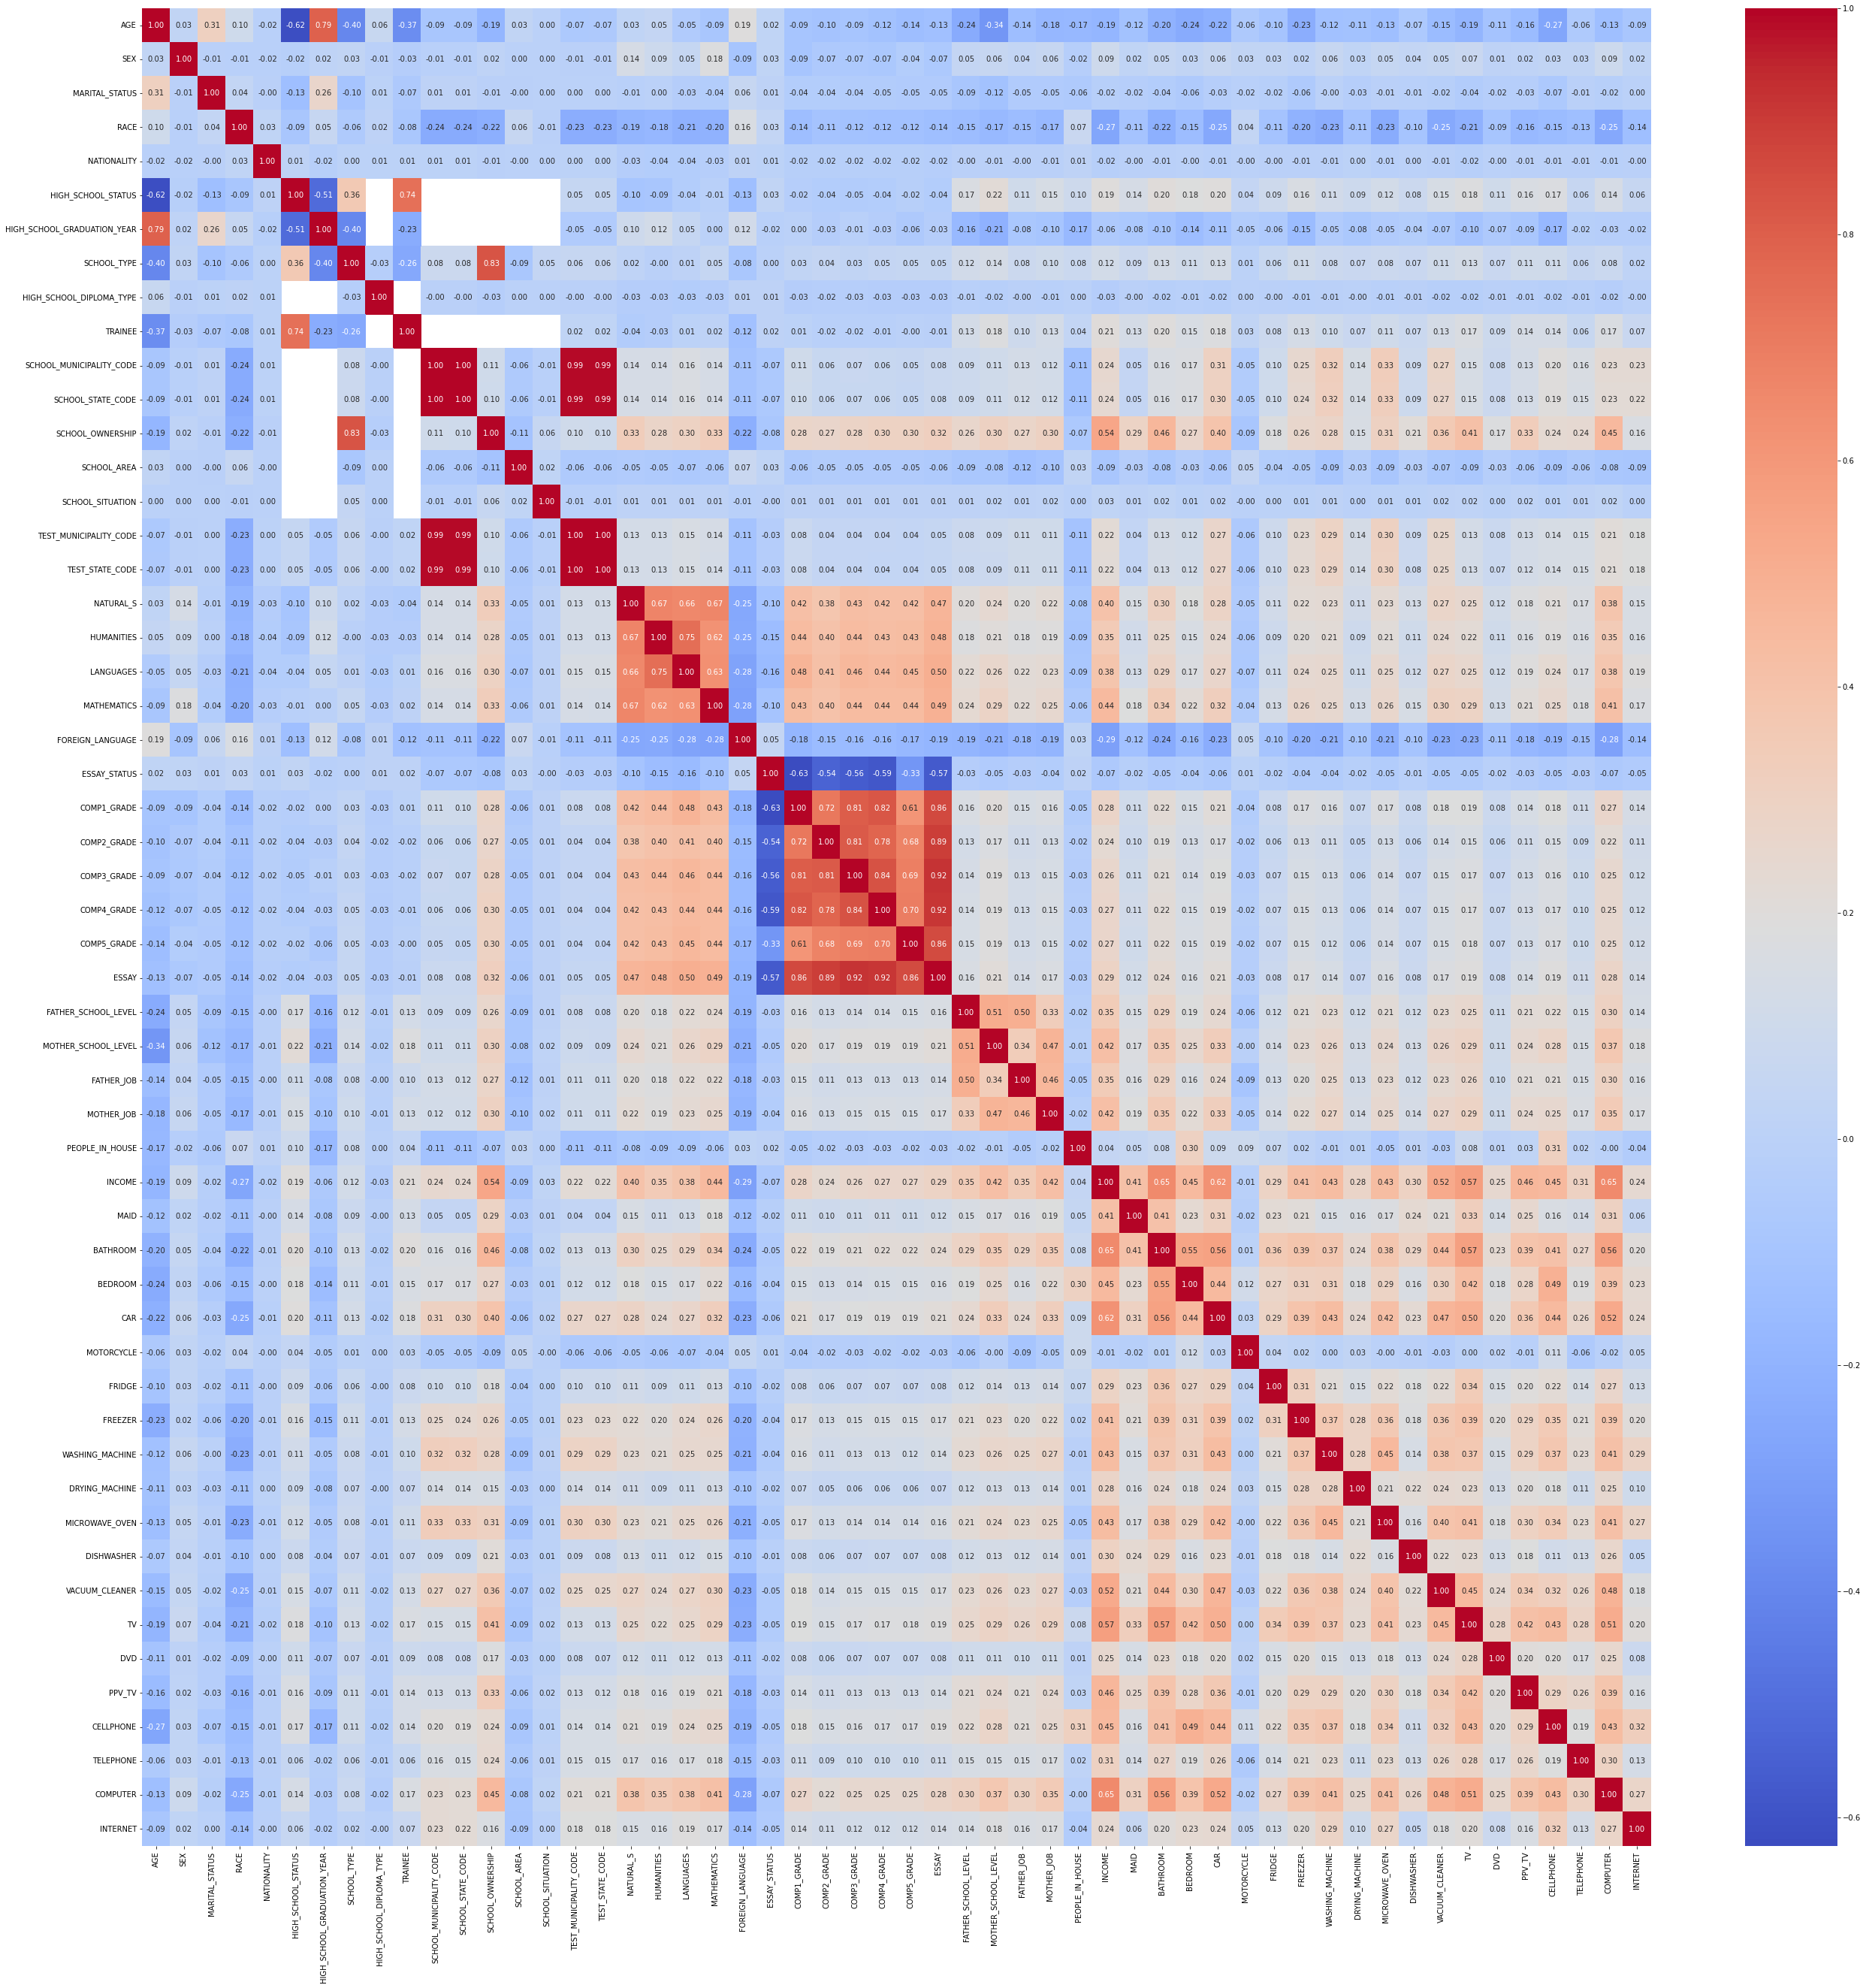

In [ ]:
# ploting correlation confusion matrix
plt. figure(figsize = (45,45))
sns.heatmap(colcor, annot = True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
#Chosing columns of interest
cols_selection = ['AGE', 'SEX', 'RACE', 'SCHOOL_TYPE','TEST_MUNICIPALITY_CODE',
                  'NATURAL_S', 'HUMANITIES', 'LANGUAGES', 'MATHEMATICS','ESSAY',
                  'TEST_STATE_NAME',  'FATHER_SCHOOL_LEVEL', 'MOTHER_SCHOOL_LEVEL', 'INCOME']

In [ ]:
#Visualizing new dataset
df_selected = df_encoded[cols_selection]
df_selected.head(5)

AGE  SEX  RACE  SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  HUMANITIES  \
0    5  0.0   1.0            1                 3144805        NaN       574.6   
1   12  1.0   1.0            1                 2704302      505.9       551.8   
2   13  0.0   1.0            1                 3515707        NaN         NaN   
3    3  1.0   3.0            2                 2304202      580.7       678.9   
4    2  0.0   3.0            2                 2300150      497.7       532.4   

   LANGUAGES  MATHEMATICS  ESSAY TEST_STATE_NAME  FATHER_SCHOOL_LEVEL  \
0      472.6          NaN  760.0              MG                  5.0   
1      498.3        461.5  560.0              AL                  1.0   
2        NaN          NaN    NaN              SP                  1.0   
3      638.9        659.5  780.0              CE                  1.0   
4      457.6        582.6  780.0              CE                  3.0   

   MOTHER_SCHOOL_LEVEL  INCOME  
0                  5.0     3.0  
1                  1.0     1.0  
2                  2.0     2.0  
3                  1.0     1.0  
4                  4.0     2.0

## Mapping

In [ ]:
# A dict to map each state into a region
region = {
    'AC': 'North',
    'AL': 'Northeast',
    'AP': 'North',
    'AM': 'North',
    'BA': 'Northeast',
    'CE': 'Northeast',
    'DF': 'Midwest',
    'ES': 'Southeast',
    'GO': 'Midwest',
    'MA': 'Northeast',
    'MT': 'Midwest',
    'MS': 'Midwest',
    'MG': 'Midwest',
    'PA': 'North',
    'PB': 'Northeast',
    'PR': 'South',
    'PE': 'Northeast',
    'PI': 'Northeast',
    'RJ': 'Southeast',
    'RN': 'Northeast',
    'RS': 'South',
    'RO': 'North',
    'RR': 'North',
    'SC': 'South',
    'SP': 'Southeast',
    'SE': 'Northeast',
    'TO': 'North'
}

## Adding Region Content

In [ ]:
# now we're going to add a new column to the table that will represent the Brazilian region where the student took the ENEM
df_selected['REGION'] = df_selected['TEST_STATE_NAME'].map(region)

<ipython-input-17-78364f96d0cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['REGION'] = df_selected['TEST_STATE_NAME'].map(region)


In [ ]:
df_selected.head(5)

AGE  SEX  RACE  SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  HUMANITIES  \
0    5  0.0   1.0            1                 3144805        NaN       574.6   
1   12  1.0   1.0            1                 2704302      505.9       551.8   
2   13  0.0   1.0            1                 3515707        NaN         NaN   
3    3  1.0   3.0            2                 2304202      580.7       678.9   
4    2  0.0   3.0            2                 2300150      497.7       532.4   

   LANGUAGES  MATHEMATICS  ESSAY TEST_STATE_NAME  FATHER_SCHOOL_LEVEL  \
0      472.6          NaN  760.0              MG                  5.0   
1      498.3        461.5  560.0              AL                  1.0   
2        NaN          NaN    NaN              SP                  1.0   
3      638.9        659.5  780.0              CE                  1.0   
4      457.6        582.6  780.0              CE                  3.0   

   MOTHER_SCHOOL_LEVEL  INCOME     REGION  
0                  5.0     3.0    Midwest  
1                  1.0     1.0  Northeast  
2                  2.0     2.0  Southeast  
3                  1.0     1.0  Northeast  
4                  4.0     2.0  Northeast

## Transforming the columns type

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   AGE                     int64   
 1   SEX                     float64 
 2   RACE                    category
 3   SCHOOL_TYPE             category
 4   TEST_MUNICIPALITY_CODE  int64   
 5   NATURAL_S               float64 
 6   HUMANITIES              float64 
 7   LANGUAGES               float64 
 8   MATHEMATICS             float64 
 9   ESSAY                   float64 
 10  TEST_STATE_NAME         category
 11  FATHER_SCHOOL_LEVEL     float64 
 12  MOTHER_SCHOOL_LEVEL     category
 13  INCOME                  category
 14  REGION                  category
dtypes: category(6), float64(7), int64(2)
memory usage: 252.2 MB


In [ ]:
df_selected['RACE'] = df_selected['RACE'].astype('category') 
df_selected['TEST_STATE_NAME']  = df_selected['TEST_STATE_NAME'].astype('category') 
df_selected['REGION'] = df_selected['REGION'].astype('category')
df_selected['MOTHER_SCHOOL_LEVEL'] = df_selected['MOTHER_SCHOOL_LEVEL'].astype('category')
df_selected['INCOME'] = df_selected['INCOME'].astype('category')
df_selected['SCHOOL_TYPE'] = df_selected['SCHOOL_TYPE'].astype('category')
#df_selected['TRAINEE'] = df_selected['TRAINEE'].astype('category')
df_loc['CD_GEOCODM']=df_loc['CD_GEOCODM'].astype(int)

<ipython-input-18-b7c27f8dd9ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['RACE'] = df_selected['RACE'].astype('category')
<ipython-input-18-b7c27f8dd9ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['TEST_STATE_NAME']  = df_selected['TEST_STATE_NAME'].astype('category')
<ipython-input-18-b7c27f8dd9ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df_selected.info()

# Initial candidates proportion of gender, race, scolarity level and incomes

### Race

We're using the translated definitions IBGE's racial categories from this [link](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_Brazil) 

In [ ]:
# List of races
races = ['ND', 'White', 'Black', 'Mixed', 'Asian', 'Indigenous', 'WI']

In [ ]:
# Taking a look into the race distribution in Brazil
racial_percentage = df_selected['RACE'].value_counts(normalize=True).sort_index()
racial_percentage

0.0    0.020989
1.0    0.401865
2.0    0.121334
3.0    0.429949
4.0    0.020205
5.0    0.005657
6.0    0.000001
Name: RACE, dtype: float64

Observation:

ND -> Not Declared

WI -> Without Information

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

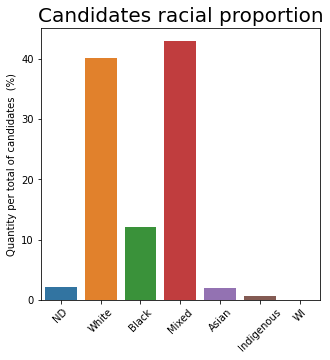

In [ ]:
# Plotting the candidates racial proportion
plt.figure(figsize=(5,5))
plt.title('Candidates racial proportion', fontsize=20)
_ = sns.barplot(x = races, y=racial_percentage*100)
plt.ylabel('Quantity per total of candidates  (%)')
plt.xticks(rotation=45)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=races, values=racial_percentage*100,
                             textinfo='label+percent',
                             direction ='clockwise', sort=True
                            )])
fig.update_traces(rotation=90)
fig.show()

### Income

In [ ]:
# Now we're going to take a look into the family income distribution among the students
income_percentage = df_selected['INCOME'].value_counts(normalize=True).sort_index()
incomes = ['None', 'Up to 1650', '1100 - 1650', '1650 - 2100', '2200 - 2750', '2750 - 3300', '3300 - 4400', '4400 - 5500', '5500 - 6600', 
           '6600 - 7700',  '7700 - 8800', '8800 - 9900', '9900 - 11000', '11000 - 13200', '13200 - 16500', '16500 - 22000', 'Over 22000'  ]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

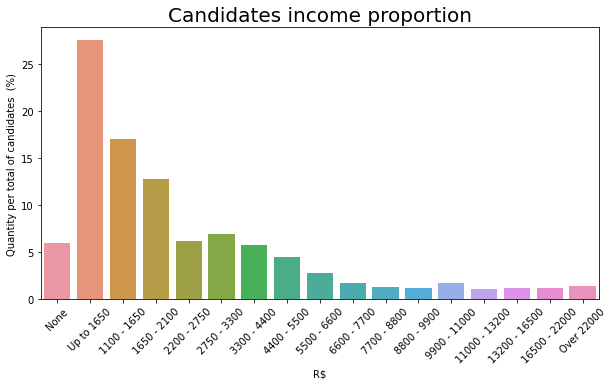

In [ ]:
# Plotting the candidates income proportion
plt.figure(figsize=(10,5))
plt.title('Candidates income proportion', fontsize=20)
_ = sns.barplot(x = incomes, y=income_percentage*100)
plt.ylabel('Quantity per total of candidates  (%)')
plt.xlabel('R$')
plt.xticks(rotation=45)

### Scolarity Level

Text(0, 0.5, 'Quantity per total of candidates  (%)')

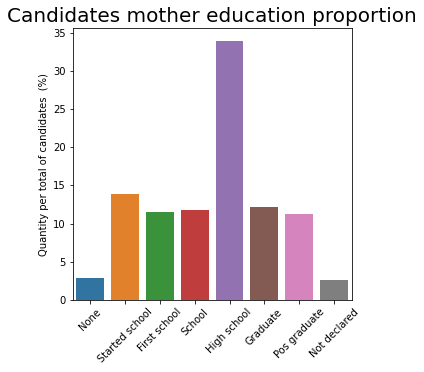

In [ ]:
# Here, the distribution of the candidates mother education
scolarity_levels = ['None','Started school','First school','School','High school','Graduate','Pos graduate','Not declared']
scol_level = df_selected['MOTHER_SCHOOL_LEVEL'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(5,5))
plt.title("Candidates mother education proportion", fontsize=20)
_ = sns.barplot(x = scolarity_levels, y=scol_level*100)
plt.xticks(rotation=45)
plt.ylabel('Quantity per total of candidates  (%)')

In [ ]:
fig = go.Figure(data=[go.Pie(labels=scolarity_levels, values=scol_level*100,
                             textinfo='label+percent',
                             direction ='clockwise', sort=True
                            )])
fig.update_traces(rotation=90)
fig.show()

# Data treatment 

## Working with NaN

In [ ]:
print(f"Dataframe shape: {df_selected.shape}")

Dataframe shape: (3389832, 15)


In [ ]:
print(f"Quantity of NaN values :\n{df_selected.isnull().sum()}")

Quantity of NaN values :
AGE                             0
SEX                             0
RACE                            0
SCHOOL_TYPE                     0
TEST_MUNICIPALITY_CODE          0
NATURAL_S                 1143988
HUMANITIES                1011453
LANGUAGES                 1011453
MATHEMATICS               1143988
ESSAY                     1011453
TEST_STATE_NAME                 0
FATHER_SCHOOL_LEVEL             2
MOTHER_SCHOOL_LEVEL             2
INCOME                          2
REGION                          0
dtype: int64


As we can see above, there're a lot of NaN values, this can possibly be explained by the amount of absentees during the pandemic.

In [ ]:
# Removing NaN values
df_selected_withoutna = df_selected.dropna()

In [ ]:
# Taking a look into the first five rows
df_selected_withoutna.head(5)

AGE  SEX RACE SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  HUMANITIES  \
1   12  1.0  1.0           1                 2704302      505.9       551.8   
3    3  1.0  3.0           2                 2304202      580.7       678.9   
4    2  0.0  3.0           2                 2300150      497.7       532.4   
8    8  0.0  3.0           2                 3106200      487.4       476.5   
9    4  0.0  3.0           2                 2927200      507.6       539.2   

   LANGUAGES  MATHEMATICS  ESSAY TEST_STATE_NAME  FATHER_SCHOOL_LEVEL  \
1      498.3        461.5  560.0              AL                  1.0   
3      638.9        659.5  780.0              CE                  1.0   
4      457.6        582.6  780.0              CE                  3.0   
8      450.7        493.4  520.0              MG                  1.0   
9      494.6        413.3  380.0              BA                  3.0   

  MOTHER_SCHOOL_LEVEL INCOME     REGION  
1                 1.0    1.0  Northeast  
3                 1.0    1.0  Northeast  
4                 4.0    2.0  Northeast  
8                 1.0    1.0    Midwest  
9                 3.0    1.0  Northeast

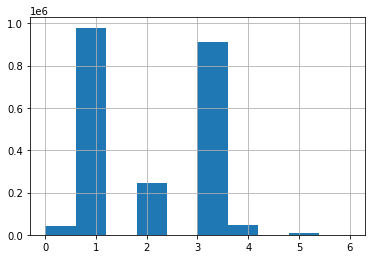

In [ ]:
# In the histogram below we can see the race distribution (after removing NaN values)
df_selected_withoutna['RACE'].hist()

In [ ]:
# Checking if all NaN values were removed
print(f"New quantity of NaN values :\n{df_selected_withoutna.isnull().sum()}")

New quantity of NaN values :
AGE                       0
SEX                       0
RACE                      0
SCHOOL_TYPE               0
TEST_MUNICIPALITY_CODE    0
NATURAL_S                 0
HUMANITIES                0
LANGUAGES                 0
MATHEMATICS               0
ESSAY                     0
TEST_STATE_NAME           0
FATHER_SCHOOL_LEVEL       0
MOTHER_SCHOOL_LEVEL       0
INCOME                    0
REGION                    0
dtype: int64


## Adding Average Content

Our goal in the first part of the project is to analyze the socioeconomic situation of the top 10,000 students. Therefore, we will select only the 10,000 rows with the highest average.

In [ ]:
# First we are going to create a column with the avg
df_selected_withoutna['AVERAGE'] = df_selected_withoutna.loc[:,
                                                       ('NATURAL_S', 'HUMANITIES', 
                                                        'LANGUAGES', 'MATHEMATICS',
                                                        'ESSAY')].mean(axis=1).round(2)

<ipython-input-67-8cd92f1697f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Taking a look into the first five rows
df_selected_withoutna.head(5)

AGE  SEX RACE SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  HUMANITIES  \
1   12  1.0  1.0           1                 2704302      505.9       551.8   
3    3  1.0  3.0           2                 2304202      580.7       678.9   
4    2  0.0  3.0           2                 2300150      497.7       532.4   
8    8  0.0  3.0           2                 3106200      487.4       476.5   
9    4  0.0  3.0           2                 2927200      507.6       539.2   

   LANGUAGES  MATHEMATICS  ESSAY TEST_STATE_NAME  FATHER_SCHOOL_LEVEL  \
1      498.3        461.5  560.0              AL                  1.0   
3      638.9        659.5  780.0              CE                  1.0   
4      457.6        582.6  780.0              CE                  3.0   
8      450.7        493.4  520.0              MG                  1.0   
9      494.6        413.3  380.0              BA                  3.0   

  MOTHER_SCHOOL_LEVEL INCOME     REGION  AVERAGE  
1                 1.0    1.0  Northeast   515.50  
3                 1.0    1.0  Northeast   667.60  
4                 4.0    2.0  Northeast   570.06  
8                 1.0    1.0    Midwest   485.60  
9                 3.0    1.0  Northeast   466.94

## Excluding students who scored 0 in any of the tests (excluding essays)

In [ ]:
# Excluding students who scored zero in any of tests (excluding essays) - In ENEM exam it is plausible to score zero in the Essay. In the other hand, it is very hard to get zero in the other subjects.
df_filtered = df_selected_withoutna[df_selected_withoutna['LANGUAGES'] *df_selected_withoutna['NATURAL_S']*df_selected_withoutna['HUMANITIES'] *df_selected_withoutna['MATHEMATICS'] != 0]

# Average grade distribution along Brazil

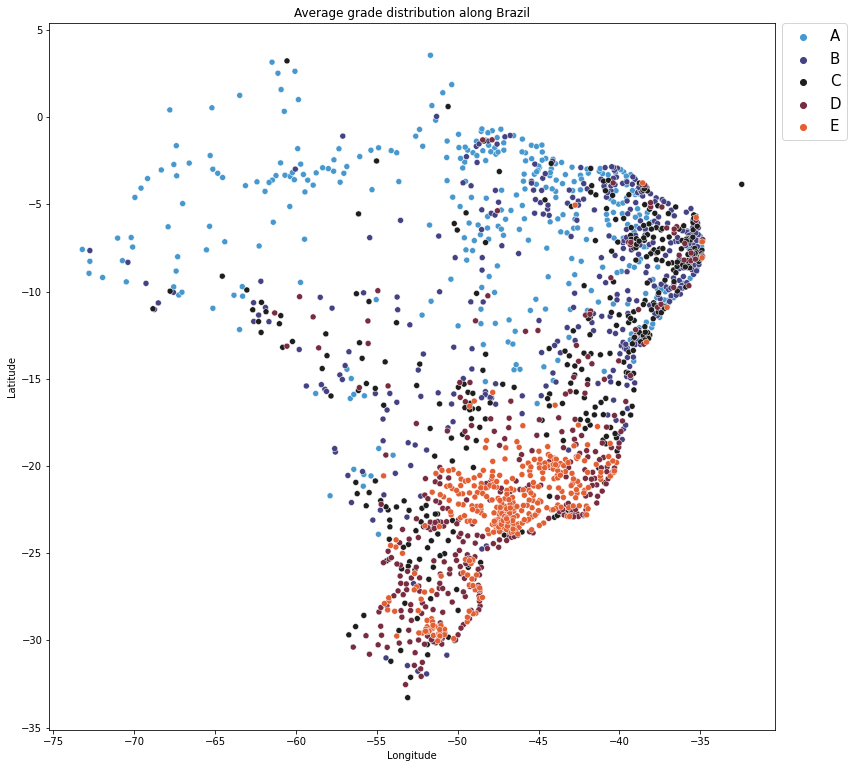

In [ ]:
# Here our idea is to see the grade distribution along the different regions in Brazil
df_loc_coords = df_loc.groupby(['CD_GEOCODM']).agg({'LAT': 'mean', 'LONG': 'mean'})
df_loc_coords = df_loc_coords.reset_index()

d_coordsJoin = df_selected_withoutna[['TEST_MUNICIPALITY_CODE','AVERAGE']].merge(df_loc_coords, left_on='TEST_MUNICIPALITY_CODE', right_on='CD_GEOCODM', how='left')
d_coords = d_coordsJoin.groupby(['CD_GEOCODM']).agg({'AVERAGE': 'mean', 'LAT': 'first', 'LONG': 'first'})

d_coords = d_coords.sort_values(by=['AVERAGE'])
intevals = []
average_group = []

n = 5 # number of intervals 
for i in range(1,n):
  intevals.append(d_coords.iloc[int(i*d_coords['AVERAGE'].count()/5)-1]['AVERAGE'])

# We are divinding grandes into 5 intervals (because in our view, this will allow us to see the distribution of grades along Brazil).
# We divided the data into five  equal groups (quintile)
# 0 - 20% is the first quintile
# from 20% to 40% is the second quintile
# from 40% to 60% is the third quintile
# from 60% to 80% is the forth quintile
# from 80% to 100% is the fifth quintile

for row in d_coords['AVERAGE']:
        if row < intevals[0] :    average_group.append('A')
        elif row < intevals[1]:   average_group.append('B')
        elif row < intevals[2]:  average_group.append('C')
        elif row < intevals[3]: average_group.append('D')
        else: average_group.append('E')
d_coords['GROUP'] = average_group

plt.figure(figsize=(13,13))
sns.scatterplot(x='LONG', y='LAT', data=d_coords, hue='GROUP',palette='icefire')
plt.title('Average grade distribution along Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0, prop={'size': 15});

# Data Analysis for a random sample

In this part of the code, our idea is to analyse a random sample and not the 10% of students with the best grade.

## Randomizing the dataset and chosing 10% of sample

In [ ]:
# Getting 10% of the total population (random sample)
df_rand = df_filtered
df_rand = df_rand.sample(frac=0.1)
df_rand.head(5)

AGE  SEX RACE SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  \
1587676    2  0.0  1.0           3                 3550308      510.4   
2198515    3  0.0  1.0           1                 3516200      417.4   
1776456    8  0.0  3.0           1                 2906709      708.5   
271948     2  1.0  3.0           2                 3147006      623.2   
1014591    3  0.0  1.0           1                 4321204      443.6   

         HUMANITIES  LANGUAGES  MATHEMATICS  ESSAY TEST_STATE_NAME  \
1587676       644.9      554.5        640.9  800.0              SP   
2198515       525.3      449.5        517.0  840.0              SP   
1776456       696.5      656.1        776.9  960.0              BA   
271948        672.1      607.4        725.2  760.0              MG   
1014591       461.6      507.6        546.2  600.0              RS   

         FATHER_SCHOOL_LEVEL MOTHER_SCHOOL_LEVEL INCOME     REGION  AVERAGE  
1587676                  6.0                 5.0   12.0  Southeast   630.14  
2198515                  0.0                 6.0    4.0  Southeast   549.84  
1776456                  3.0                 3.0    0.0  Northeast   759.60  
271948                   3.0                 6.0    6.0    Midwest   677.58  
1014591                  2.0                 2.0    3.0      South   511.80

In [ ]:
df_rand.shape

(223542, 16)

## Elbow Curve

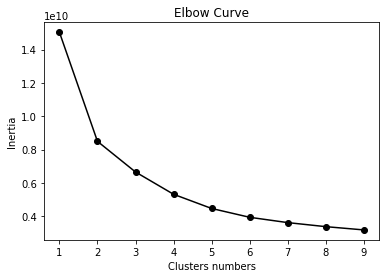

In [ ]:
# Now we are going to plot the elbow curve
df_rand_select = (df_rand[["NATURAL_S", "HUMANITIES", "LANGUAGES", "MATHEMATICS", "ESSAY"]])
inertia = []
n=1
for k in range (n,10):
  kmeans = KMeans(n, random_state=0).fit(df_rand_select)
  n+=1
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, '-o', color='black')
plt.title('Elbow Curve')
plt.xlabel('Clusters numbers')
plt.ylabel('Inertia') 
plt.show()

## Clustering




In [ ]:
#creating the clustering model
n_clusters = 4
kmeans = KMeans(n_clusters, init="k-means++", random_state=0)

#training the model
selection = ["NATURAL_S", "HUMANITIES", "LANGUAGES", "MATHEMATICS", "ESSAY"]
kmeans.fit(df_rand[selection])  

KMeans(n_clusters=4, random_state=0)

In [ ]:
#adding the column "cluster" in the table
df_rand['CLUSTERS'] = kmeans.labels_ 

#categorizing the column
df_rand['CLUSTERS'] = df_rand['CLUSTERS'].astype('object')

In [ ]:
df_rand.head(5)

AGE  SEX RACE SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  \
1587676    2  0.0  1.0           3                 3550308      510.4   
2198515    3  0.0  1.0           1                 3516200      417.4   
1776456    8  0.0  3.0           1                 2906709      708.5   
271948     2  1.0  3.0           2                 3147006      623.2   
1014591    3  0.0  1.0           1                 4321204      443.6   

         HUMANITIES  LANGUAGES  MATHEMATICS  ESSAY TEST_STATE_NAME  \
1587676       644.9      554.5        640.9  800.0              SP   
2198515       525.3      449.5        517.0  840.0              SP   
1776456       696.5      656.1        776.9  960.0              BA   
271948        672.1      607.4        725.2  760.0              MG   
1014591       461.6      507.6        546.2  600.0              RS   

         FATHER_SCHOOL_LEVEL MOTHER_SCHOOL_LEVEL INCOME     REGION  AVERAGE  \
1587676                  6.0                 5.0   12.0  Southeast   630.14   
2198515                  0.0                 6.0    4.0  Southeast   549.84   
1776456                  3.0                 3.0    0.0  Northeast   759.60   
271948                   3.0                 6.0    6.0    Midwest   677.58   
1014591                  2.0                 2.0    3.0      South   511.80   

        CLUSTERS  
1587676        3  
2198515        0  
1776456        3  
271948         3  
1014591        0

In [ ]:
# Adding the columns "CLUSTER" and "AVERAGE" into the table
df_rand2 = df_rand[selection + ['CLUSTERS', 'AVERAGE']]
df_rand2.head(5)

NATURAL_S  HUMANITIES  LANGUAGES  MATHEMATICS  ESSAY CLUSTERS  \
1587676      510.4       644.9      554.5        640.9  800.0        3   
2198515      417.4       525.3      449.5        517.0  840.0        0   
1776456      708.5       696.5      656.1        776.9  960.0        3   
271948       623.2       672.1      607.4        725.2  760.0        3   
1014591      443.6       461.6      507.6        546.2  600.0        0   

         AVERAGE  
1587676   630.14  
2198515   549.84  
1776456   759.60  
271948    677.58  
1014591   511.80

In [ ]:
#viewing clusters and some indicators
#df_rand.groupby(['CLUSTERS']).describe().T
df_rand2.groupby(['CLUSTERS']).describe().T 

CLUSTERS                      0             1            2             3
NATURAL_S   count  86843.000000  82827.000000  6809.000000  47063.000000
            mean     495.629575    437.777803   438.789205    589.637242
            std       58.544824     49.439715    60.970455     66.862876
            min      316.700000    310.400000   312.500000    342.700000
            25%      454.200000    401.400000   393.700000    547.600000
            50%      495.700000    434.900000   429.600000    591.000000
            75%      538.000000    470.200000   475.400000    632.000000
            max      723.200000    671.500000   697.500000    856.600000
HUMANITIES  count  86843.000000  82827.000000  6809.000000  47063.000000
            mean     540.242265    452.064199   451.823205    630.669830
            std       67.421975     61.042980    74.405770     62.122528
            min      323.300000    311.900000   320.500000    331.000000
            25%      498.700000    405.200000   394.300000    592.700000
            50%      548.400000    447.200000   438.000000    631.200000
            75%      586.900000    495.100000   497.700000    671.600000
            max      800.400000    743.900000   741.700000    846.900000
LANGUAGES   count  86843.000000  82827.000000  6809.000000  47063.000000
            mean     522.821732    444.830198   437.652063    589.218730
            std       52.063633     55.966830    70.120321     51.679712
            min      300.200000    298.000000   298.000000    311.900000
            25%      491.200000    404.400000   383.900000    557.700000
            50%      526.600000    446.400000   429.400000    591.100000
            75%      558.400000    485.800000   484.800000    623.400000
            max      743.400000    660.800000   680.900000    805.700000
MATHEMATICS count  86843.000000  82827.000000  6809.000000  47063.000000
            mean     538.418968    457.164578   463.089073    679.884618
            std       80.211149     59.882323    75.296224     81.378734
            min      320.100000    311.400000   312.400000    376.900000
            25%      476.100000    412.400000   408.400000    629.200000
            50%      536.800000    447.100000   445.300000    679.800000
            75%      598.800000    492.400000   501.100000    731.400000
            max      886.000000    763.100000   922.500000    953.100000
ESSAY       count  86843.000000  82827.000000  6809.000000  47063.000000
            mean     665.506719    509.446678    19.794390    832.872533
            std       96.523371     83.458359    65.968906     90.080020
            min      300.000000    280.000000     0.000000    380.000000
            25%      600.000000    460.000000     0.000000    780.000000
            50%      660.000000    520.000000     0.000000    840.000000
            75%      720.000000    560.000000     0.000000    900.000000
            max      980.000000    840.000000   260.000000   1000.000000
AVERAGE     count  86843.000000  82827.000000  6809.000000  47063.000000
            mean     552.523852    460.256691   362.229587    664.456591
            std       31.899103     32.515677    44.671182     45.043647
            min      462.500000    335.940000   266.320000    564.940000
            25%      527.060000    437.560000   329.080000    629.340000
            50%      551.020000    463.320000   352.800000    655.980000
            75%      577.410000    485.220000   386.160000    692.530000
            max      650.760000    561.940000   568.700000    859.960000

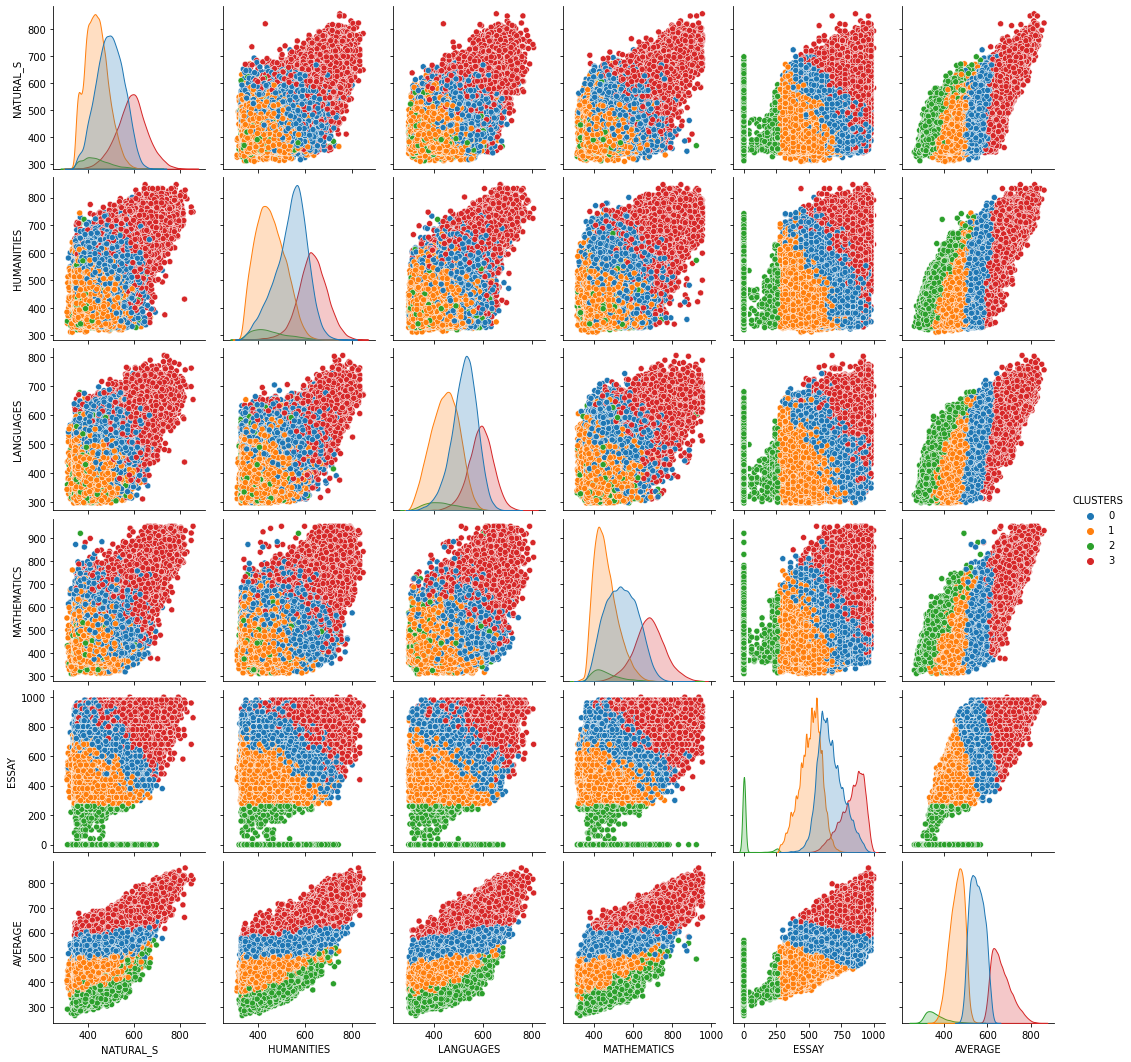

In [ ]:
sns_plot = sns.pairplot(df_rand2, hue='CLUSTERS', palette="tab10")

## Comparing Cluster and Original Data

<Figure size 720x720 with 0 Axes>

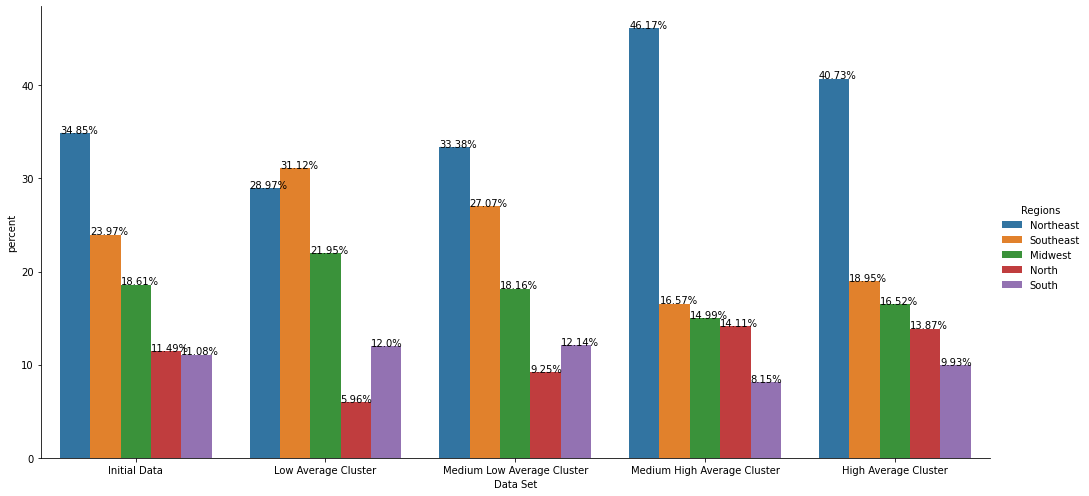

In [ ]:
#clusters are named based on their average, with "a" having the higher average and "d" the lower average
cluster_a = df_rand[df_rand['CLUSTERS']  == 1]
cluster_b = df_rand[df_rand['CLUSTERS']  == 2]
cluster_c = df_rand[df_rand['CLUSTERS']  == 0]
cluster_d = df_rand[df_rand['CLUSTERS']  == 3]

plt.figure(figsize=(10, 10))

data = {'Low Average Cluster': cluster_d['REGION'],
        'High Average Cluster': cluster_a['REGION'],
        'Medium High Average Cluster': cluster_b['REGION'],
        'Medium Low Average Cluster': cluster_c['REGION'],
        'Initial Data': df_selected['REGION'],
}

df_copy = pd.DataFrame(data)
df1 = df_copy.melt(var_name='Data Set', value_name='Regions')

x,y = 'Data Set', 'Regions'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2, order = ['Initial Data','Low Average Cluster','Medium Low Average Cluster','Medium High Average Cluster','High Average Cluster'])

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [ ]:
df1.head()

Data Set    Regions    percent
0  High Average Cluster  Northeast  40.731887
1  High Average Cluster  Southeast  18.952757
2  High Average Cluster    Midwest  16.517561
3  High Average Cluster      North  13.871081
4  High Average Cluster      South   9.926715

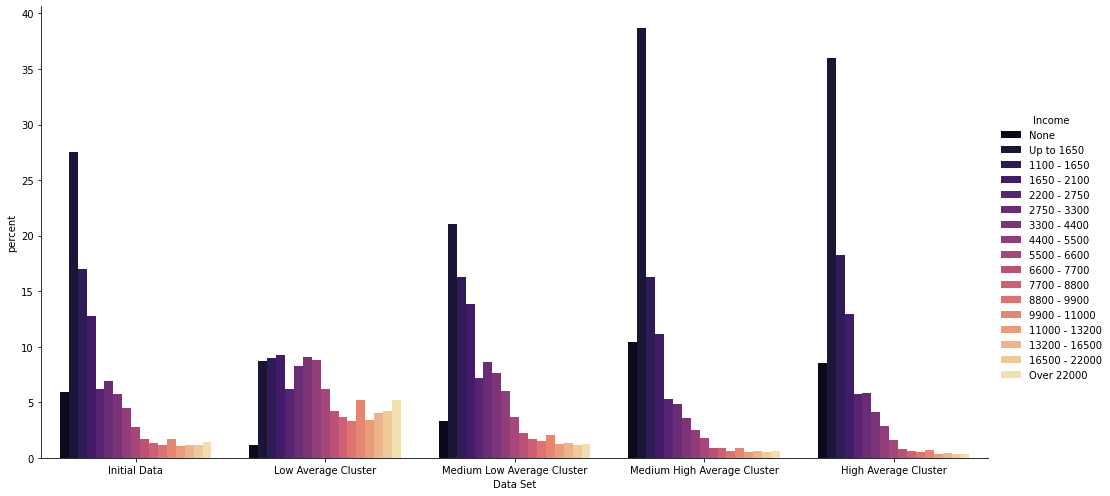

In [ ]:
# Plotting the family income in the different clusters 
data = {'Low Average Cluster': cluster_d['INCOME'],
        'High Average Cluster': cluster_a['INCOME'],
        'Medium High Average Cluster': cluster_b['INCOME'],
        'Medium Low Average Cluster': cluster_c['INCOME'],
        'Initial Data': df_selected['INCOME'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='Income')

x,y = 'Data Set', 'Income'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1 = df1.sort_values(by=[y])

#creating a dictionary to map the encoded values to more meaningful ones
dict_map = {key:value for (key,value) in zip(df1[y].unique(), incomes)}
df1[y] = df1[y].map(dict_map)


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2, palette='magma',order = ['Initial Data','Low Average Cluster','Medium Low Average Cluster','Medium High Average Cluster','High Average Cluster'])

Where: Q represent the highest family income and A the lowest one.

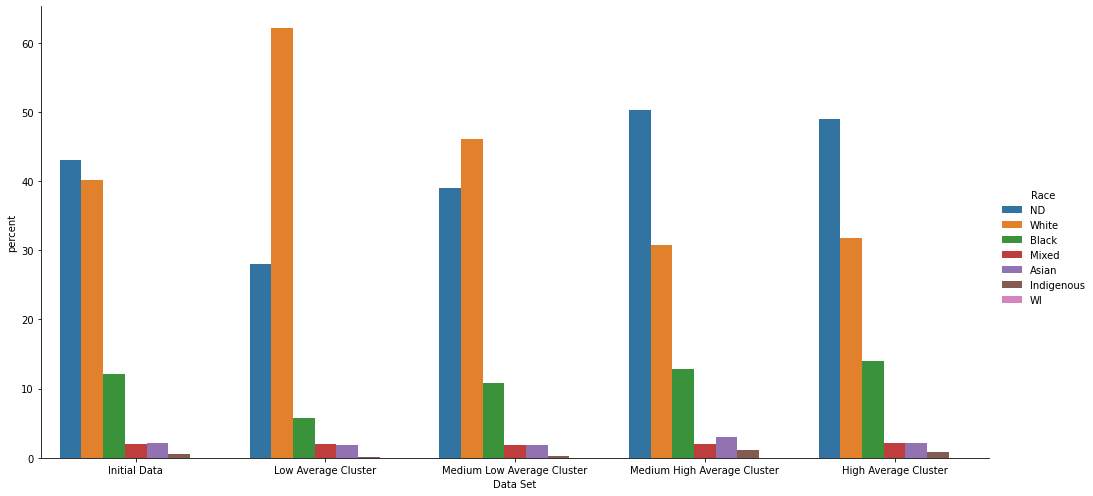

In [ ]:
# Plotting the race distribution into the different clusters
data = {'Low Average Cluster': cluster_d['RACE'],
        'High Average Cluster': cluster_a['RACE'],
        'Medium High Average Cluster': cluster_b['RACE'],
        'Medium Low Average Cluster': cluster_c['RACE'],
        'Initial Data': df_selected['RACE'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='Race')

x,y = 'Data Set', 'Race'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#creating a dictionary to map the encoded values to more meaningful ones
dict_map = {key:value for (key,value) in zip(df1[y].unique(), races)}
df1[y] = df1[y].map(dict_map)

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2,order = ['Initial Data','Low Average Cluster','Medium Low Average Cluster','Medium High Average Cluster','High Average Cluster'])

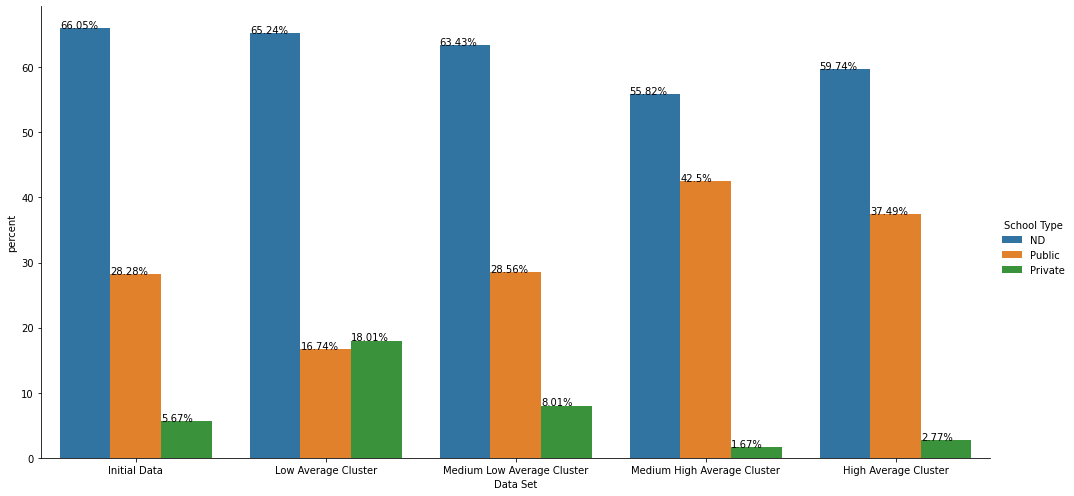

In [ ]:
# Plotting the distribution of students in different types of schools into the different clusters.
data = {'Low Average Cluster': cluster_d['SCHOOL_TYPE'],
        'High Average Cluster': cluster_a['SCHOOL_TYPE'],
        'Medium High Average Cluster': cluster_b['SCHOOL_TYPE'],
        'Medium Low Average Cluster': cluster_c['SCHOOL_TYPE'],
        'Initial Data': df_selected['SCHOOL_TYPE'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='School Type')

x,y = 'Data Set', 'School Type'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#creating a dictionary to map the encoded values to more meaningful ones
school_type = ['ND','Public','Private']
dict_map = {key:value for (key,value) in zip(df1[y].unique(), school_type)}
df1[y] = df1[y].map(dict_map)

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2,order = ['Initial Data','Low Average Cluster','Medium Low Average Cluster','Medium High Average Cluster','High Average Cluster'])
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Data Analysis for the best averages


## Filtering the top 100.000

In [ ]:
# Ordering the data by the AVG
df_top_all = df_filtered.sort_values(by='AVERAGE', ascending=False)
df_top_all.head(5)

AGE  SEX RACE SCHOOL_TYPE  TEST_MUNICIPALITY_CODE  NATURAL_S  \
604348     4  1.0  1.0           1                 3304557      789.1   
2513764   12  1.0  1.0           1                 3550308      822.5   
1252845    9  1.0  1.0           1                 4314902      783.6   
557854     3  1.0  1.0           1                 3518800      803.0   
334699     4  1.0  1.0           1                 3128709      856.6   

         HUMANITIES  LANGUAGES  MATHEMATICS   ESSAY TEST_STATE_NAME  \
604348        800.4      779.8        944.1  1000.0              RJ   
2513764       827.0      756.1        934.2   960.0              SP   
1252845       832.5      751.0        944.1   960.0              RS   
557854        824.0      780.8        948.8   900.0              SP   
334699        812.9      720.6        925.1   940.0              MG   

         FATHER_SCHOOL_LEVEL MOTHER_SCHOOL_LEVEL INCOME     REGION  AVERAGE  
604348                   4.0                 4.0   12.0  Southeast   862.68  
2513764                  5.0                 5.0   16.0  Southeast   859.96  
1252845                  2.0                 5.0   10.0      South   854.24  
557854                   5.0                 6.0   16.0  Southeast   851.32  
334699                   6.0                 5.0   14.0    Midwest   851.04

In [ ]:
# FIltering the top 100k
df_top = df_top_all[:100000]
df_top.shape

(100000, 16)

## Elbow Curve

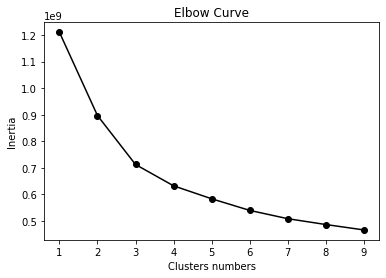

In [ ]:
df_top_select = (df_top[["NATURAL_S", "HUMANITIES", "LANGUAGES", "MATHEMATICS", "ESSAY"]])
inertia = []
n=1
for k in range (n,10):
  kmeans = KMeans(n, random_state=0).fit(df_top_select)
  n+=1
  inertia.append(kmeans.inertia_)


plt.plot(range(1, 10), inertia, '-o', color='black')
plt.title('Elbow Curve')
plt.xlabel('Clusters numbers')
plt.ylabel('Inertia') 
plt.show()

## Random Trees 


In [ ]:
import sklearn as sk

In [ ]:
df_selected_withoutna['AVERAGE'] = round(df_selected_withoutna['AVERAGE'])
df_selected_withoutna[['SEX', 'RACE', 'SCHOOL_TYPE']]

<ipython-input-37-49c12f96a02a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SEX RACE SCHOOL_TYPE
1        1.0  1.0           1
3        1.0  3.0           2
4        0.0  3.0           2
8        0.0  3.0           2
9        0.0  3.0           2
...      ...  ...         ...
3389793  0.0  1.0           1
3389807  1.0  3.0           1
3389814  1.0  1.0           1
3389815  0.0  3.0           1
3389830  0.0  1.0           1

[2238106 rows x 3 columns]

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(df_selected_withoutna[['SEX', 'RACE', 'SCHOOL_TYPE']],
                                                                        df_selected_withoutna["AVERAGE"], test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [ ]:
dt.feature_importances_, dt.feature_names_in_

(array([0.08337437, 0.5230297 , 0.39359593]),
 array(['SEX', 'RACE', 'SCHOOL_TYPE'], dtype=object))

### Evaluation - tree classification

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(np.array(y_test), np.array(dt_preds), average = "micro") # Decision tree

0.005044434813302295

We will not use this method due the low score.

## Clustering




In [ ]:
#creating the clustering model
n_clusters = 4
kmeans = KMeans(n_clusters, init="k-means++", random_state=0)

#training the model
selection = ["NATURAL_S", "HUMANITIES", "LANGUAGES", "MATHEMATICS", "ESSAY"]
kmeans.fit(df_top[selection])  


KMeans(n_clusters=4, random_state=0)

In [ ]:
#adding the column "cluster" in the table
df_top['CLUSTERS'] = kmeans.labels_ 

#categorizing the column
df_top['CLUSTERS'] = df_top['CLUSTERS'].astype('object')

<ipython-input-88-6e637bf55b2a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-6e637bf55b2a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_top2 = df_top[selection + ['CLUSTERS', 'AVERAGE']]
df_top2.head(5)

NATURAL_S  HUMANITIES  LANGUAGES  MATHEMATICS   ESSAY CLUSTERS  \
604348       789.1       800.4      779.8        944.1  1000.0        2   
2513764      822.5       827.0      756.1        934.2   960.0        2   
1252845      783.6       832.5      751.0        944.1   960.0        2   
557854       803.0       824.0      780.8        948.8   900.0        2   
334699       856.6       812.9      720.6        925.1   940.0        2   

         AVERAGE  
604348    862.68  
2513764   859.96  
1252845   854.24  
557854    851.32  
334699    851.04

In [ ]:
#viewing clusters and some indicators
df_top2.groupby(['CLUSTERS']).describe().T

CLUSTERS                      0             1             2             3
NATURAL_S   count  29907.000000  16344.000000  23497.000000  30252.000000
            mean     651.788755    673.647907    712.800153    636.861034
            std       34.525707     38.067669     35.682419     35.221165
            min      391.400000    507.300000    565.000000    424.900000
            25%      629.400000    648.000000    689.000000    614.100000
            50%      652.600000    672.800000    711.700000    637.300000
            75%      675.200000    698.600000    734.700000    660.500000
            max      856.600000    867.100000    867.100000    806.100000
HUMANITIES  count  29907.000000  16344.000000  23497.000000  30252.000000
            mean     662.140455    706.865155    728.039052    694.899131
            std       30.644329     36.721113     34.605465     31.994260
            min      368.800000    500.400000    551.200000    557.600000
            25%      642.800000    681.700000    704.300000    672.800000
            50%      662.800000    705.000000    726.000000    693.200000
            75%      682.700000    730.200000    749.800000    715.400000
            max      795.000000    846.900000    846.900000    846.900000
LANGUAGES   count  29907.000000  16344.000000  23497.000000  30252.000000
            mean     608.957425    647.377564    663.217266    642.796813
            std       30.674249     33.573330     34.342719     30.728961
            min      361.500000    382.500000    484.400000    492.800000
            25%      590.400000    625.100000    640.200000    622.200000
            50%      610.300000    646.000000    662.000000    641.500000
            75%      629.300000    668.800000    684.800000    662.300000
            max      724.100000    805.700000    826.100000    802.200000
MATHEMATICS count  29907.000000  16344.000000  23497.000000  30252.000000
            mean     772.199933    787.417083    828.551147    712.165143
            std       32.638842     48.760117     44.336033     32.161927
            min      667.700000    610.500000    679.300000    525.500000
            25%      749.500000    753.500000    795.800000    692.900000
            50%      769.500000    783.000000    823.900000    714.700000
            75%      791.700000    816.525000    857.000000    734.700000
            max      953.100000    953.100000    953.100000    831.700000
ESSAY       count  29907.000000  16344.000000  23497.000000  30252.000000
            mean     915.066038    793.034753    920.022982    911.881528
            std       33.833883     51.175185     35.293161     35.688288
            min      820.000000    440.000000    800.000000    780.000000
            25%      880.000000    760.000000    900.000000    880.000000
            50%      920.000000    800.000000    920.000000    920.000000
            75%      940.000000    840.000000    940.000000    940.000000
            max     1000.000000    860.000000   1000.000000    980.000000
AVERAGE     count  29907.000000  16344.000000  23497.000000  30252.000000
            mean     722.030521    721.668492    770.526120    719.720730
            std       14.094064     16.110459     18.395655     14.720570
            min      699.580000    699.580000    734.660000    699.580000
            25%      709.900000    708.300000    756.660000    707.400000
            50%      720.880000    718.780000    767.100000    716.960000
            75%      733.180000    732.460000    781.460000    729.885000
            max      759.940000    796.100000    862.680000    776.020000

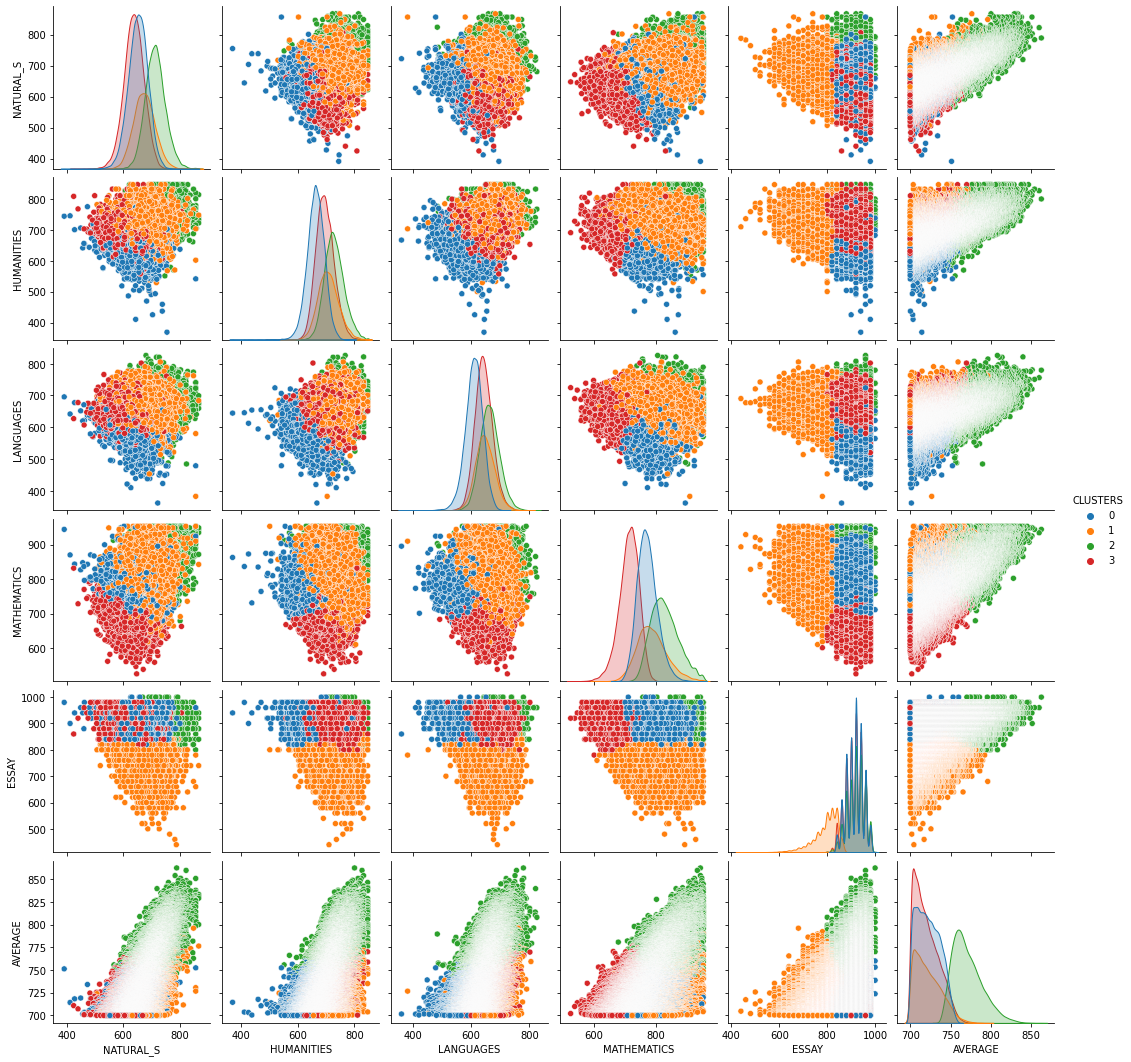

In [ ]:
sns_plot = sns.pairplot(df_top2, hue='CLUSTERS', palette="tab10")

##Cluster Analysis

In [ ]:
cluster0 = df_top[df_top['CLUSTERS']  == 2]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

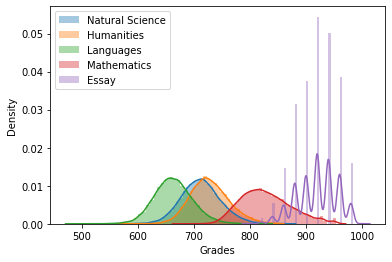

In [ ]:
#grades histograms
sns.distplot(cluster0['NATURAL_S'], kde = True,label = 'Natural Science')
sns.distplot(cluster0['HUMANITIES'], kde = True, label = 'Humanities')
sns.distplot(cluster0['LANGUAGES'], kde = True, label = 'Languages')
sns.distplot(cluster0['MATHEMATICS'], kde = True, label = 'Mathematics')
sns.distplot(cluster0['ESSAY'], kde = True, label = 'Essay')
plt.xlabel('Grades')
plt.legend()
plt.show()

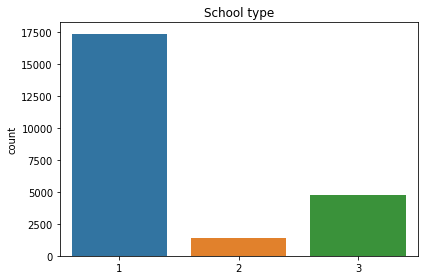

In [ ]:
#school type
sns.countplot(x='SCHOOL_TYPE', data=cluster0)
plt.xlabel('')
plt.title('School type')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



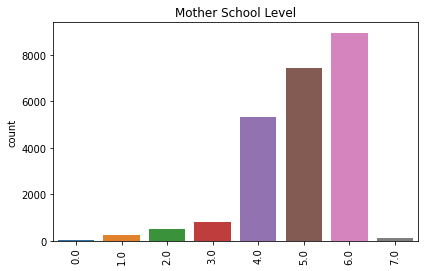

In [ ]:
#mother school level
sns.countplot(x='MOTHER_SCHOOL_LEVEL', data=cluster0)
plt.title('Mother School Level')
plt.tight_layout()
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

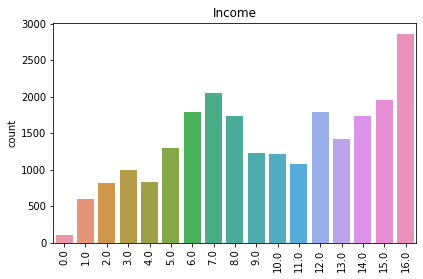

In [ ]:
#family monthly income
sns.countplot(x='INCOME', data=cluster0)
plt.title('Income')
plt.tight_layout()
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

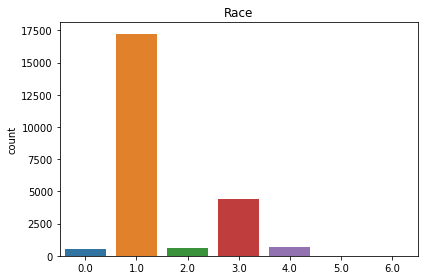

In [ ]:
#barplot race frequency
sns.countplot(x='RACE', data=cluster0)
plt.xlabel('')
plt.title('Race')
plt.tight_layout()
plt.show()

In [ ]:
#barplot race frequency


fig = go.Figure(data=[go.Pie(labels=races, values=racial_percentage*100,
                             textinfo='label+percent',
                             direction ='clockwise', sort=True
                            )])
fig.update_traces(rotation=90)
fig.show()

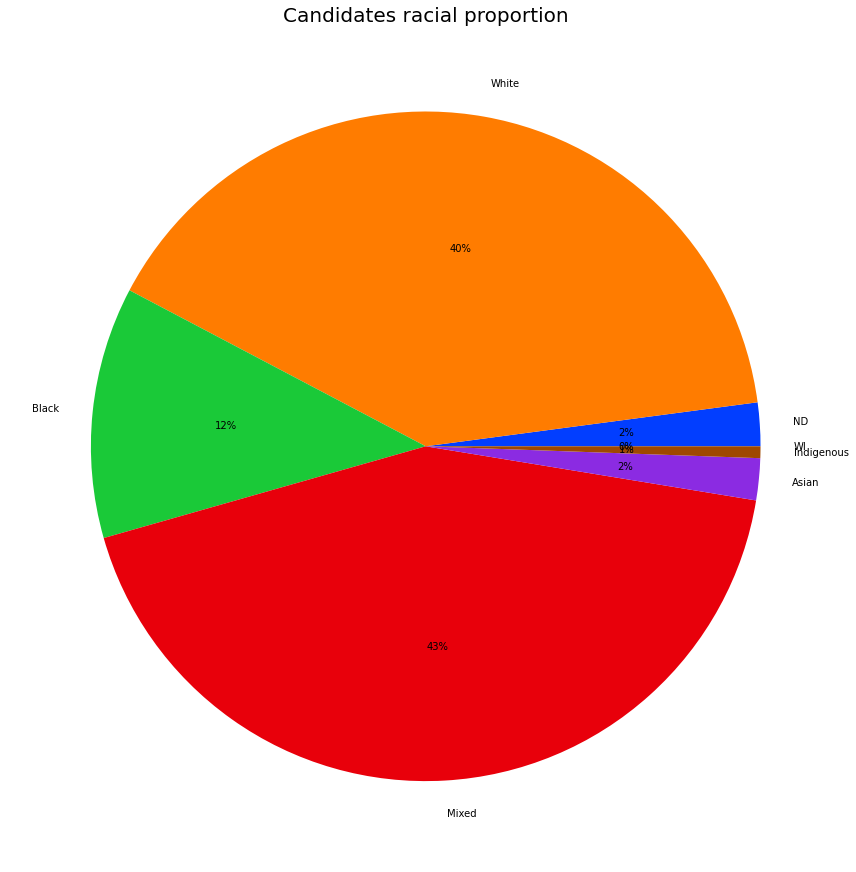

In [ ]:
plt.figure(figsize=(15,20))
plt.title('Candidates racial proportion', fontsize=20)
palette_color = sns.color_palette('bright')

_ = plt.pie(racial_percentage*100, labels=races, colors=palette_color,autopct='%.0f%%')

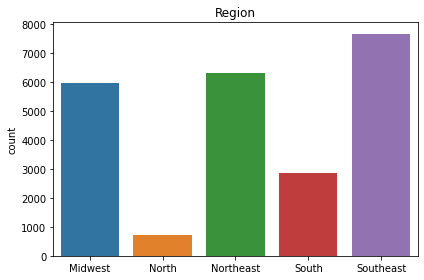

In [ ]:
#region frequency
sns.countplot(x='REGION', data=cluster0)
plt.xlabel('')
plt.title('Region')
plt.tight_layout()
plt.show()

In [ ]:
cluster_low = df_top[df_top['CLUSTERS']  == 1]
cluster_high = df_top[df_top['CLUSTERS']  == 2]
total = df_selected['RACE']

<Figure size 720x720 with 0 Axes>

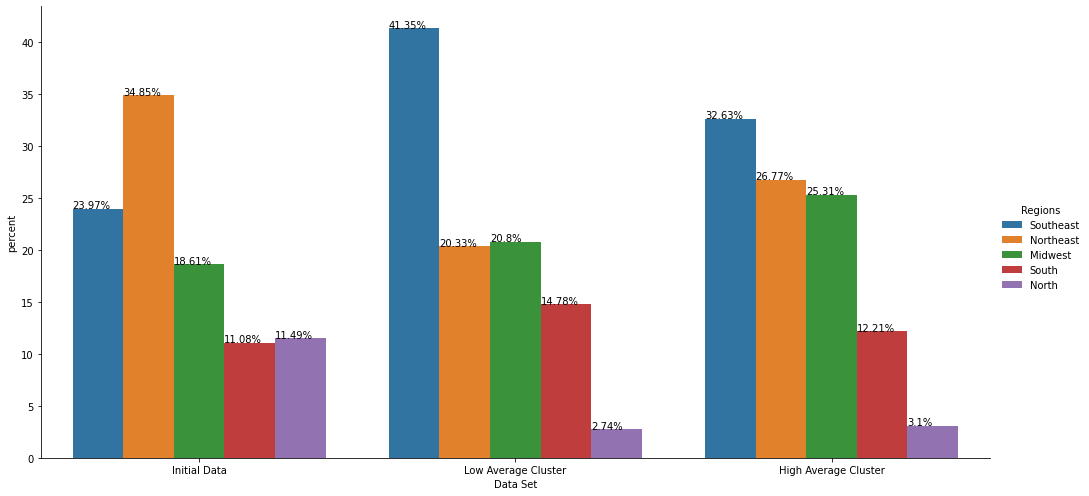

In [ ]:
plt.figure(figsize=(10, 10))

data = {'Low Average Cluster': cluster_low['REGION'],
        'High Average Cluster': cluster_high['REGION'],
        'Initial Data': df_selected['REGION'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='Regions')

x,y = 'Data Set', 'Regions'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2, order = ['Initial Data','Low Average Cluster','High Average Cluster'])

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


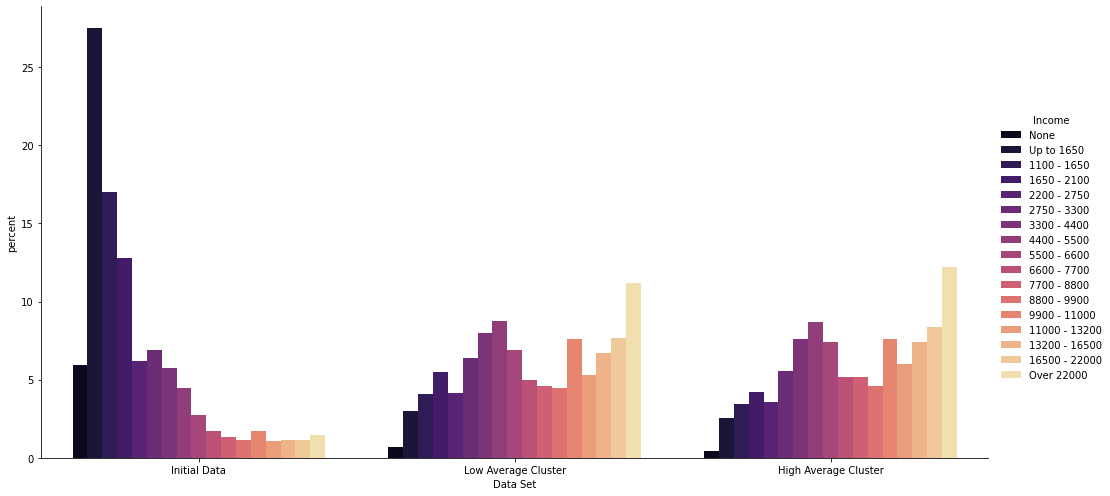

In [ ]:
data = {'Low Average Cluster': cluster_low['INCOME'],
        'High Average Cluster': cluster_high['INCOME'],
        'Initial Data': df_selected['INCOME'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='Income')

x,y = 'Data Set', 'Income'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1 = df1.sort_values(by=['Income'])

#creating a dictionary to map the encoded values to more meaningful ones
dict_map = {key:value for (key,value) in zip(df1[y].unique(), incomes)}
df1[y] = df1[y].map(dict_map)

g = sns.catplot(x=x,y='percent',hue=y,palette = 'magma',kind='bar',data=df1,height=7, aspect=2, order = ['Initial Data','Low Average Cluster','High Average Cluster'])


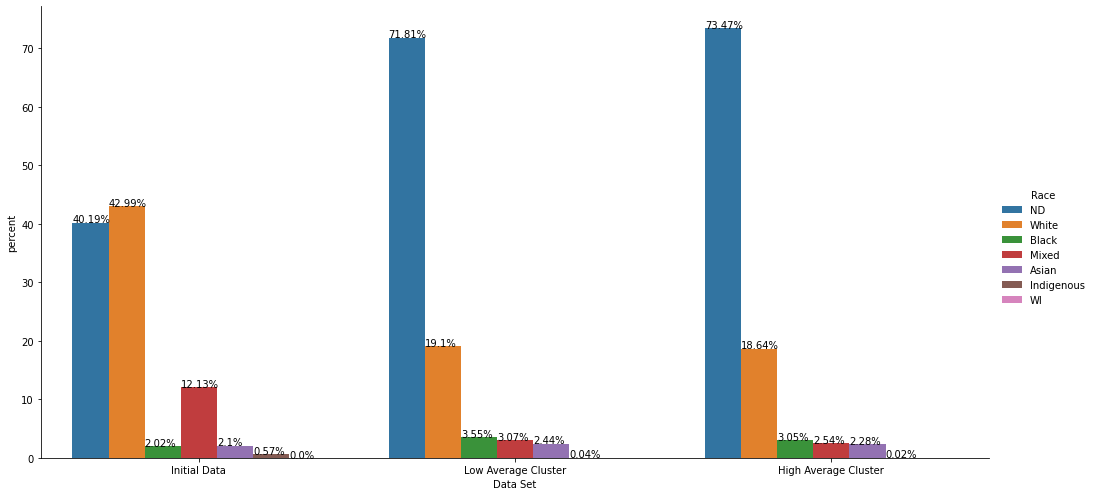

In [ ]:

data = {'Low Average Cluster': cluster_low['RACE'],
        'High Average Cluster': cluster_high['RACE'],
        'Initial Data': df_selected['RACE'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='Race')

x,y = 'Data Set', 'Race'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#creating a dictionary to map the encoded values to more meaningful ones
dict_map = {key:value for (key,value) in zip(df1[y].unique(), races)}
df1[y] = df1[y].map(dict_map)

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2, order = ['Initial Data','Low Average Cluster','High Average Cluster'])

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

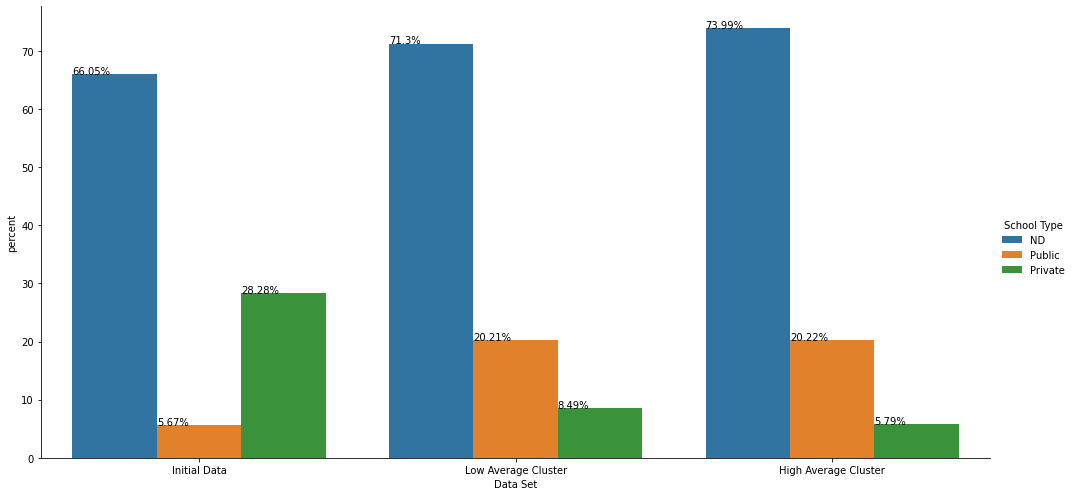

In [ ]:
# Plotting the distribution of students in different types of schools into the different clusters.
data = {'Low Average Cluster': cluster_low['SCHOOL_TYPE'],
        'High Average Cluster': cluster_high['SCHOOL_TYPE'],
        'Initial Data': df_selected['SCHOOL_TYPE'],
}

df = pd.DataFrame(data)
df1 = df.melt(var_name='Data Set', value_name='School Type')

x,y = 'Data Set', 'School Type'
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

#creating a dictionary to map the encoded values to more meaningful ones
school_type = ['ND','Public','Private']
dict_map = {key:value for (key,value) in zip(df1[y].unique(), school_type)}
df1[y] = df1[y].map(dict_map)

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7, aspect=2,order = ['Initial Data','Low Average Cluster','High Average Cluster'])
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)